<a href="https://colab.research.google.com/github/Hari-Harish-24/OIBGRIP/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARY FUNCTIONS

In [5]:
import pandas as pd              #pandas is a lib function used for data analyzis 
import numpy as np               #numpy used to work with arrars (Numerical python)
import os
import matplotlib.pyplot as plt 
import seaborn as sns            #seaborn is also like matplot extended version of matplotlib uses panda and numpy

IMPORTING THE DATASET

In [9]:
df=pd.read_csv('iris.csv')       # t0 the the data set (iris.csv)
df.head()                        # to disply first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df=df.drop(columns=['Id'])  #delete the id column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()         #to return description of data in th data frame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()                # Prints th information abt the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df['Species'].value_counts()       # to display no of samples on each class 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

PREPROCESSING THE DATASET

In [21]:
df.isnull().sum                  # to check null values

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

EXPLORATARY DATA ANALYSIS

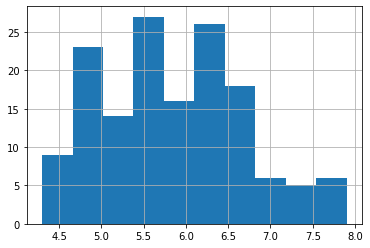

In [22]:
df['SepalLengthCm'].hist()          # hist-histogram graph

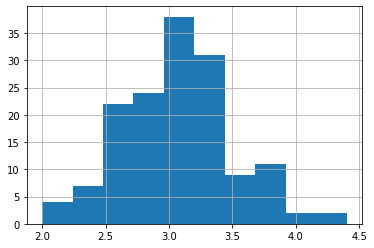

In [23]:
df['SepalWidthCm'].hist() 

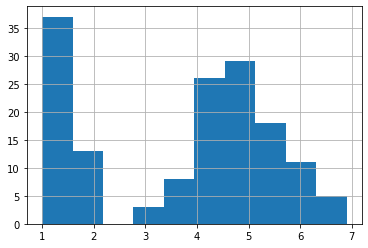

In [24]:
df['PetalLengthCm'].hist() 

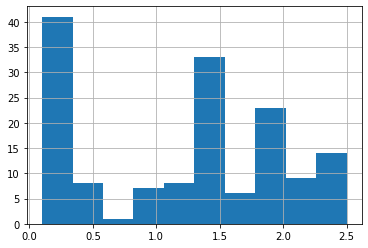

In [25]:
df['PetalWidthCm'].hist() 

In [30]:
colors = ['red','orange','green']           # scatterplot
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

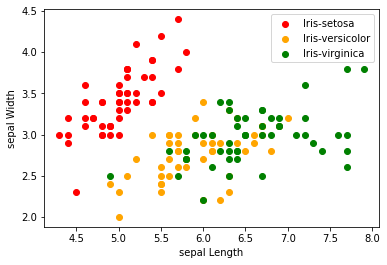

In [32]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i],label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("sepal Width")
plt.legend()

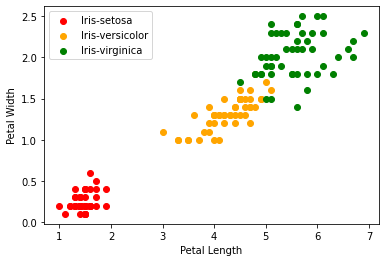

In [35]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

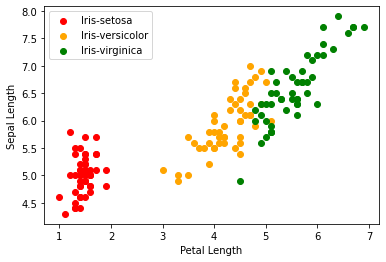

In [36]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'], c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

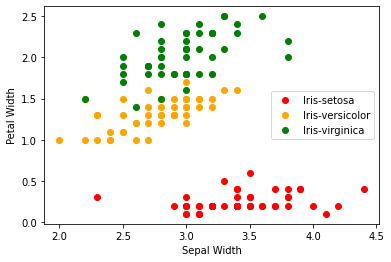

In [37]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

CORELATION MATRIX

it is a table showing correlation coefficient between variables
the values lies btw -1 and 1 

In [38]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


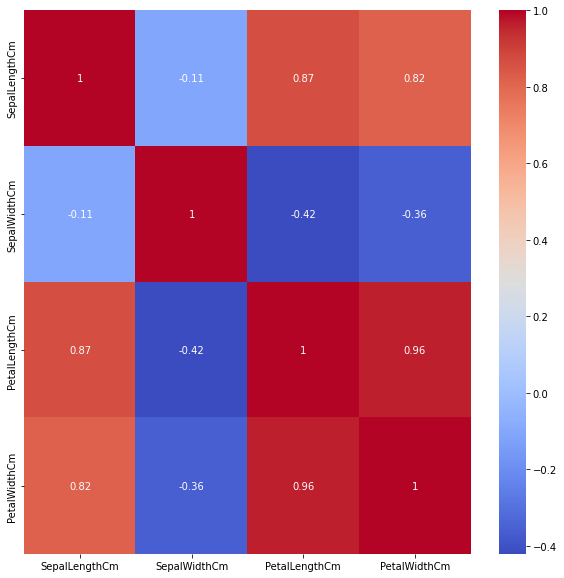

In [40]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

LABEL ENCODER

In [42]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [43]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINNING

In [100]:
from sklearn.model_selection import train_test_split
#train  70
#test   30
X= df.drop(columns=['Species'])
Y= df['Species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
# model training
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [95]:
# knn - k-nearest neibours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [96]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [97]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0
